In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import pyplot as plt
%matplotlib inline

## Get the data from Ingrid that we need

### SST data

In [2]:
ds = xr.open_dataset('http://kage.ldeo.columbia.edu:81/expert/SOURCES/.LDEO/.ClimateGroup/.PROJECTS/.CCM3/.goga/.sst_goga_1856-2013-1.nc/dods', decode_times = False)
ds = ds.rename({'Y': 'lat', 'X':'lon', 'Z': 'lev', 'T': 'time'})
ds['time'] = pd.date_range('1856-01-01', periods = ds.time.size, freq='MS')
ds = ds.sel(time=slice('1856-01-01', '2012-12-01'))
ds

<xarray.Dataset>
Dimensions:  (lat: 64, lev: 1, lon: 128, time: 1884)
Coordinates:
  * lat      (lat) float32 -87.86 -85.07079 -82.28159 ... 85.07079 87.86
  * lon      (lon) float32 0.0 2.812598 5.625197 ... 351.5748 354.3874 357.2
  * lev      (lev) float32 0.0
  * time     (time) datetime64[ns] 1856-01-01 1856-02-01 ... 2012-12-01
Data variables:
    sst      (time, lev, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL

### Geopotential height data

In [3]:
ds_hgt = xr.open_dataset('http://kage.ldeo.columbia.edu:81/SOURCES/.LDEO/.ClimateGroup/.PROJECTS/.CCM3/.goga/.atm-mean/.PLD/.Z3.nc/.Z3/dods', decode_times = False)
ds_hgt = ds_hgt.rename({'Y': 'lat', 'X':'lon', 'P': 'pres', 'T': 'time'})
ds_hgt['time'] = pd.date_range('1856-01-01', periods = ds_hgt.time.size, freq='MS')
ds_hgt

<xarray.Dataset>
Dimensions:  (lat: 64, lon: 128, pres: 17, time: 1884)
Coordinates:
  * pres     (pres) float32 1000.0 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 -87.8638 -85.09653 -82.31291 ... 85.09653 87.8638
  * lon      (lon) float32 0.0 2.8125 5.625 8.4375 ... 351.5625 354.375 357.1875
  * time     (time) datetime64[ns] 1856-01-01 1856-02-01 ... 2012-12-01
Data variables:
    Z3       (time, pres, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL

## Figure 0 
### Calculate Nino 3.4 (170°W - 120°W, 5°N - 5°S) SST index

In [4]:
# function to remove mean (create anomaly)
def remove_time_mean(x):
    return x - x.mean(dim = 'time')

In [5]:
# calculate gloabl anomaly
sst_anom = ds.groupby('time.month').apply(remove_time_mean)
sst_anom

<xarray.Dataset>
Dimensions:  (lat: 64, lev: 1, lon: 128, time: 1884)
Coordinates:
  * lat      (lat) float32 -87.86 -85.07079 -82.28159 ... 85.07079 87.86
  * lon      (lon) float32 0.0 2.812598 5.625197 ... 351.5748 354.3874 357.2
  * lev      (lev) float32 0.0
  * time     (time) datetime64[ns] 1856-01-01 1856-02-01 ... 2012-12-01
Data variables:
    sst      (time, lev, lat, lon) float32 -1.9073486e-06 ... 8.34465e-07
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [6]:
# select region
sst_anom_region  = sst_anom.sst.sel(lon = slice(190, 240), lat = slice(-5, 5))
sst_anom_region


<xarray.DataArray 'sst' (time: 1884, lev: 1, lat: 4, lon: 18)>
array([[[[ 1.157457, ...,  0.413309],
         ...,
         [ 1.170076, ...,  0.510164]]],


       ...,


       [[[ 0.66568 , ..., -0.073584],
         ...,
         [ 0.355263, ...,  0.632456]]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -4.18381 -1.394603 1.394603 4.18381
  * lon      (lon) float32 191.2567 194.0693 196.8819 ... 236.2583 239.0709
  * lev      (lev) float32 0.0
  * time     (time) datetime64[ns] 1856-01-01 1856-02-01 ... 2012-12-01

In [7]:
# select region
sst_anom_region  = sst_anom.sst.sel(lon = slice(190, 240), lat = slice(-5, 5))
sst_anom_region


<xarray.DataArray 'sst' (time: 1884, lev: 1, lat: 4, lon: 18)>
array([[[[ 1.157457, ...,  0.413309],
         ...,
         [ 1.170076, ...,  0.510164]]],


       ...,


       [[[ 0.66568 , ..., -0.073584],
         ...,
         [ 0.355263, ...,  0.632456]]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -4.18381 -1.394603 1.394603 4.18381
  * lon      (lon) float32 191.2567 194.0693 196.8819 ... 236.2583 239.0709
  * lev      (lev) float32 0.0
  * time     (time) datetime64[ns] 1856-01-01 1856-02-01 ... 2012-12-01

In [8]:
# resample data using rolling mean for every 3 months
sst_anom_rolling = sst_anom_region.rolling(time = 3, center = True).mean() # 3 month rolling mean
sst_anom_rolling

<xarray.DataArray (time: 1884, lev: 1, lat: 4, lon: 18)>
array([[[[nan, ..., nan],
         ...,
         [nan, ..., nan]]],


       ...,


       [[[nan, ..., nan],
         ...,
         [nan, ..., nan]]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -4.18381 -1.394603 1.394603 4.18381
  * lon      (lon) float32 191.2567 194.0693 196.8819 ... 236.2583 239.0709
  * lev      (lev) float32 0.0
  * time     (time) datetime64[ns] 1856-01-01 1856-02-01 ... 2012-12-01

/Users/ariannavaruolo/Downloads/pwd/envs/geo_scipy/lib/python3.6/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


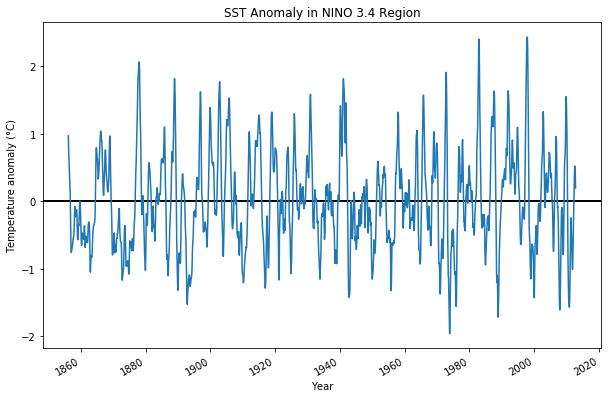

In [9]:
# now have the rolling mean so average over lat and lon
sst_index = sst_anom_rolling.mean(dim = ('lon', 'lat'))

# plot the data
fig, ax = plt.subplots(figsize = (10, 6)) # create figure 
ax.axhline(linewidth=2, color='k') # add horizontal axis line at 0 deg C 
sst_index.plot(ax = ax); # plot the data 
ax.set_title('SST Anomaly in NINO 3.4 Region'); # set title
ax.set_ylabel('Temperature anomaly (°C)'); # set y label
ax.set_xlabel('Year'); # set x label 

fig.savefig('rces-project_fig0.png')

### In order to correlate SST index to geopotential height, we won't use the rolling mean that we used to plot. 

In [10]:
sst_index4corr = sst_anom_region.mean(dim = ('lon', 'lat'))
sst_index4corr


<xarray.DataArray 'sst' (time: 1884, lev: 1)>
array([[ 1.162963],
       [ 0.951042],
       [ 0.794077],
       ...,
       [ 0.351643],
       [ 0.333045],
       [-0.099254]], dtype=float32)
Coordinates:
  * lev      (lev) float32 0.0
  * time     (time) datetime64[ns] 1856-01-01 1856-02-01 ... 2012-12-01

## Figure 1 
### S. America Climatology of 200 mb geopotential height

In [11]:
hgt_200 = ds_hgt.sel(pres = 200)
hgt_200

<xarray.Dataset>
Dimensions:  (lat: 64, lon: 128, time: 1884)
Coordinates:
    pres     float32 200.0
  * lat      (lat) float32 -87.8638 -85.09653 -82.31291 ... 85.09653 87.8638
  * lon      (lon) float32 0.0 2.8125 5.625 8.4375 ... 351.5625 354.375 357.1875
  * time     (time) datetime64[ns] 1856-01-01 1856-02-01 ... 2012-12-01
Data variables:
    Z3       (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL

In [12]:
# calculate gloabl anomaly
hgt_anom = hgt_200.groupby('time.month').apply(remove_time_mean)
hgt_anom

<xarray.Dataset>
Dimensions:  (lat: 64, lon: 128, time: 1884)
Coordinates:
    pres     float32 200.0
  * lat      (lat) float32 -87.8638 -85.09653 -82.31291 ... 85.09653 87.8638
  * lon      (lon) float32 0.0 2.8125 5.625 8.4375 ... 351.5625 354.375 357.1875
  * time     (time) datetime64[ns] 1856-01-01 1856-02-01 ... 2012-12-01
Data variables:
    Z3       (time, lat, lon) float32 38.16992 38.214844 ... -6.743164 -6.791992
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [13]:
hgt_climo = hgt_200.mean(dim = 'time')
hgt_climo

<xarray.Dataset>
Dimensions:  (lat: 64, lon: 128)
Coordinates:
    pres     float32 200.0
  * lat      (lat) float32 -87.8638 -85.09653 -82.31291 ... 85.09653 87.8638
  * lon      (lon) float32 0.0 2.8125 5.625 8.4375 ... 351.5625 354.375 357.1875
Data variables:
    Z3       (lat, lon) float32 10639.954 10639.918 ... 11165.377 11165.497

/Users/ariannavaruolo/Downloads/pwd/envs/geo_scipy/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/ariannavaruolo/Downloads/pwd/envs/geo_scipy/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/Users/ariannavaruolo/Downloads/pwd/envs/geo_scipy/lib/python3.6/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


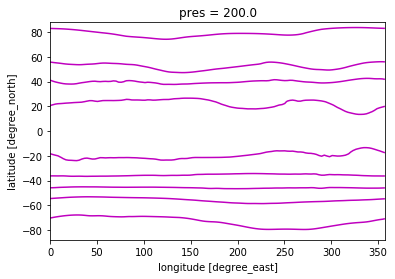

In [14]:
hgt_climo.Z3.plot.contour(colors = 'm')

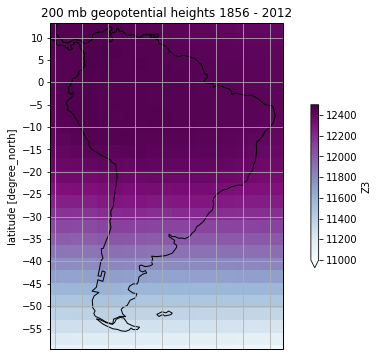

In [15]:
# PLOTTING OVER SOUTH AMERICA
extent = [275, 327, -57, 12] # set extent 
central_lon = np.mean(extent[:2]) # get first two values in extent which are longitudes to calc center lon
central_lat = np.mean(extent[2:]) # get last two values in extent which are latutides to calc center lat

map_proj = ccrs.PlateCarree(central_lon) # this is the project we want our map to be on 
data_proj = ccrs.PlateCarree() # the data is in lat/lon, we can use PlateCarrree 

fig, ax = plt.subplots(figsize = (10, 6)) #, 
      #                subplot_kw = {'projection':map_proj}) # create figure 
#plt.figure(figsize = (12,6)) # create figure 
ax = plt.axes(projection = map_proj) # create axis that has the map projection we want 
ax.set_extent(extent) # set extent based on what we have defined above

ax.add_feature(cfeature.OCEAN, facecolor = 'w', edgecolor = 'k') # add ocean, make it white 
ax.add_feature(cfeature.LAND, facecolor = 'w', edgecolor = 'k') # add land,make it white with black edges
#ax[0,0].add_feature(cfeature.STATES, edgecolor = 'k') # add states and make the edges black 
ax.add_feature(cfeature.COASTLINE, edgecolor = 'k') # add coastline feature and set color to be white and edgecolor to be black 

#ax.set_xticks([-85, -60, -35], crs=ccrs.PlateCarree())
ax.set_yticks([-55, -50, -45, -40, -35, -30, -25, -20, 
              -15, -10, -5, 0, 5, 10], crs=ccrs.PlateCarree())

#cs = hgt_climo.Z3.plot.contourf(transform = data_proj, ax = ax) #, levels = 75, colors = 'm')
cs1 = hgt_climo.Z3.plot(transform = data_proj, vmin = 11000, vmax = 12500, cmap = 'BuPu', cbar_kwargs = {'shrink':0.5}, )
#plt.clabel(cs, fmt = '%1.0f m') # use plt to format the contour labels using clabel, %1.0f tell python to only show string of whole numbers and we added unit
ax.gridlines();
ax.set_title('200 mb geopotential heights 1856 - 2012');

fig.savefig('rces-project_fig1.png')

## Figure 2 
### Patagonia seasonal climatologies of 200 mb geopotential height

### Group by seasons 

In [16]:
hgt_season = hgt_200.groupby('time.season').mean('time')
hgt_season

<xarray.Dataset>
Dimensions:  (lat: 64, lon: 128, season: 4)
Coordinates:
    pres     float32 200.0
  * lat      (lat) float32 -87.8638 -85.09653 -82.31291 ... 85.09653 87.8638
  * lon      (lon) float32 0.0 2.8125 5.625 8.4375 ... 351.5625 354.375 357.1875
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    Z3       (season, lat, lon) float32 10887.308 10887.456 ... 11098.0

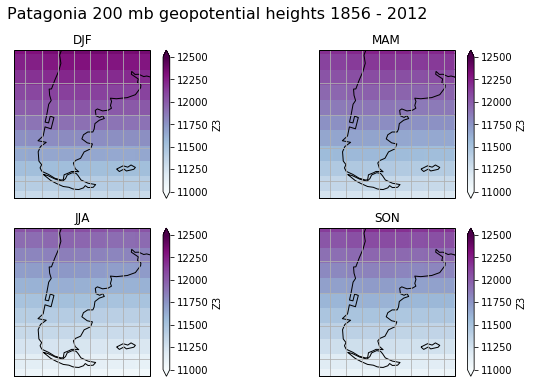

In [31]:
# PLOTTING OVER PATAGONIA
extent = [280, 305, -57, -30] # set extent 
central_lon = np.mean(extent[:2]) # get first two values in extent which are longitudes to calc center lon
central_lat = np.mean(extent[2:]) # get last two values in extent which are latutides to calc center lat

map_proj = ccrs.PlateCarree(central_lon) # this is the project we want our map to be on 
data_proj = ccrs.PlateCarree() # the data is in lat/lon, we can use PlateCarrree 

fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = (10, 6), 
                      subplot_kw = {'projection':map_proj}) # create figure 
fig.suptitle('Patagonia 200 mb geopotential heights 1856 - 2012', fontsize=16)

ax[0,0].set_extent(extent) # set extent based on what we have defined above

ax[0,0].add_feature(cfeature.OCEAN, facecolor = 'w', edgecolor = 'k') # add ocean, make it white 
ax[0,0].add_feature(cfeature.LAND, facecolor = 'w', edgecolor = 'k') # add land,make it white with black edges
ax[0,0].add_feature(cfeature.COASTLINE, edgecolor = 'k') # add coastline feature and set color to be white and edgecolor to be black 

#cs = hgt_season.Z3.sel(season = 'DJF').plot.contour(transform = data_proj, ax = ax[0,0], levels = 30, colors = 'm')
#plt.clabel(cs, fmt = '%1.0f m') # use plt to format the contour labels using clabel, %1.0f tell python to only show string of whole numbers and we added unit
cs1 = hgt_season.Z3.sel(season = 'DJF').plot(transform = data_proj, vmin = 11000, vmax = 12500, cmap = 'BuPu', ax = ax[0,0]);
ax[0,0].gridlines();
ax[0,0].set_title('DJF');

ax[0,1].set_extent(extent) # set extent based on what we have defined above

ax[0,1].add_feature(cfeature.OCEAN, facecolor = 'w', edgecolor = 'k') # add ocean, make it white 
ax[0,1].add_feature(cfeature.LAND, facecolor = 'w', edgecolor = 'k') # add land,make it white with black edges
ax[0,1].add_feature(cfeature.COASTLINE, edgecolor = 'k') # add coastline feature and set color to be white and edgecolor to be black 


#cs = hgt_season.Z3.sel(season = 'MAM').plot.contour(transform = data_proj, ax = ax[0,1], levels = 30, colors = 'm')
#plt.clabel(cs, fmt = '%1.0f m') # use plt to format the contour labels using clabel, %1.0f tell python to only show string of whole numbers and we added unit
cs1 = hgt_season.Z3.sel(season = 'MAM').plot(transform = data_proj, vmin = 11000, vmax = 12500, cmap = 'BuPu', ax = ax[0,1]); #, cbar_kwargs = {'shrink':0.5}, )
ax[0,1].gridlines();
ax[0,1].set_title('MAM');

ax[1,0].set_extent(extent) # set extent based on what we have defined above

ax[1,0].add_feature(cfeature.OCEAN, facecolor = 'w', edgecolor = 'k') # add ocean, make it white 
ax[1,0].add_feature(cfeature.LAND, facecolor = 'w', edgecolor = 'k') # add land,make it white with black edges
ax[1,0].add_feature(cfeature.COASTLINE, edgecolor = 'k') # add coastline feature and set color to be white and edgecolor to be black 


#cs = hgt_season.Z3.sel(season = 'JJA').plot.contour(transform = data_proj, ax = ax[1,0], levels = 30, colors = 'm')
#plt.clabel(cs, fmt = '%1.0f m') # use plt to format the contour labels using clabel, %1.0f tell python to only show string of whole numbers and we added unit
cs1 = hgt_season.Z3.sel(season = 'JJA').plot(transform = data_proj, vmin = 11000, vmax = 12500, cmap = 'BuPu', ax = ax[1,0]);
ax[1,0].gridlines();
ax[1,0].set_title('JJA');

ax[1,1].set_extent(extent) # set extent based on what we have defined above

ax[1,1].add_feature(cfeature.OCEAN, facecolor = 'w', edgecolor = 'k') # add ocean, make it white 
ax[1,1].add_feature(cfeature.LAND, facecolor = 'w', edgecolor = 'k') # add land,make it white with black edges
ax[1,1].add_feature(cfeature.COASTLINE, edgecolor = 'k') # add coastline feature and set color to be white and edgecolor to be black 

#cs = hgt_season.Z3.sel(season = 'SON').plot.contour(transform = data_proj, ax = ax[1,1], levels = 30, colors = 'm')
#plt.clabel(cs, fmt = '%1.0f m') # use plt to format the contour labels using clabel, %1.0f tell python to only show string of whole numbers and we added unit
cs1 = hgt_season.Z3.sel(season = 'SON').plot(transform = data_proj, vmin = 11000, vmax = 12500, cmap = 'BuPu', ax = ax[1,1]);
ax[1,1].gridlines();
ax[1,1].set_title('SON');
#bar = plt.colorbar(cs1, ax = ax[1,1])
#bar.remove();

#cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
#fig.colorbar(cs1, cax=cbar_ax)

fig.savefig('rces-project_fig2.png')

## Figure 3 
### Central Andes seasonal climatologies of 200 mb geopotential height

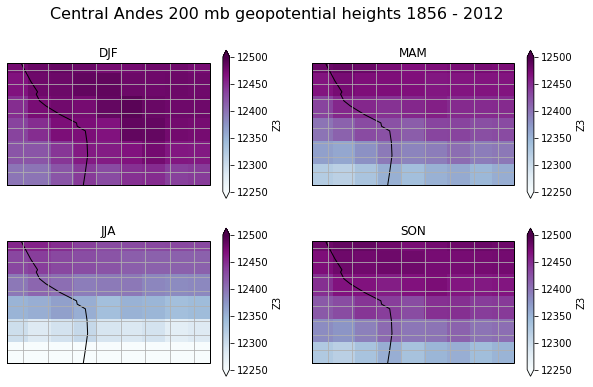

In [27]:
# PLOTTING OVER CENTRAL ANDES 
extent = [280, 305, -25, -10] # set extent 
central_lon = np.mean(extent[:2]) # get first two values in extent which are longitudes to calc center lon
central_lat = np.mean(extent[2:]) # get last two values in extent which are latutides to calc center lat

map_proj = ccrs.PlateCarree(central_lon) # this is the project we want our map to be on 
data_proj = ccrs.PlateCarree() # the data is in lat/lon, we can use PlateCarrree 

fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = (10, 6), 
                      subplot_kw = {'projection':map_proj}) # create figure 
fig.suptitle('Central Andes 200 mb geopotential heights 1856 - 2012', fontsize=16)

ax[0,0].set_extent(extent) # set extent based on what we have defined above

ax[0,0].add_feature(cfeature.OCEAN, facecolor = 'w', edgecolor = 'k') # add ocean, make it white 
ax[0,0].add_feature(cfeature.LAND, facecolor = 'w', edgecolor = 'k') # add land,make it white with black edges
ax[0,0].add_feature(cfeature.COASTLINE, edgecolor = 'k') # add coastline feature and set color to be white and edgecolor to be black 


#cs = hgt_season.Z3.sel(season = 'DJF').plot.contour(transform = data_proj, ax = ax[0,0], levels = 100, colors = 'm')
#plt.clabel(cs, fmt = '%1.0f m') # use plt to format the contour labels using clabel, %1.0f tell python to only show string of whole numbers and we added unit
cs1 = hgt_season.Z3.sel(season = 'DJF').plot(transform = data_proj, vmin = 12250, vmax = 12500, cmap = 'BuPu', ax = ax[0,0]); #, cbar_kwargs = {'shrink':0.5}, )
ax[0,0].gridlines();
ax[0,0].set_title('DJF');

ax[0,1].set_extent(extent) # set extent based on what we have defined above

ax[0,1].add_feature(cfeature.OCEAN, facecolor = 'w', edgecolor = 'k') # add ocean, make it white 
ax[0,1].add_feature(cfeature.LAND, facecolor = 'w', edgecolor = 'k') # add land,make it white with black edges
ax[0,1].add_feature(cfeature.COASTLINE, edgecolor = 'k') # add coastline feature and set color to be white and edgecolor to be black 


#cs = hgt_season.Z3.sel(season = 'MAM').plot.contour(transform = data_proj, ax = ax[0,1], levels = 100, colors = 'm')
#plt.clabel(cs, fmt = '%1.0f m') # use plt to format the contour labels using clabel, %1.0f tell python to only show string of whole numbers and we added unit
cs1 = hgt_season.Z3.sel(season = 'MAM').plot(transform = data_proj, vmin = 12250, vmax = 12500, cmap = 'BuPu', ax = ax[0,1]);
ax[0,1].gridlines();
ax[0,1].set_title('MAM');

ax[1,0].set_extent(extent) # set extent based on what we have defined above

ax[1,0].add_feature(cfeature.OCEAN, facecolor = 'w', edgecolor = 'k') # add ocean, make it white 
ax[1,0].add_feature(cfeature.LAND, facecolor = 'w', edgecolor = 'k') # add land,make it white with black edges
ax[1,0].add_feature(cfeature.COASTLINE, edgecolor = 'k') # add coastline feature and set color to be white and edgecolor to be black 


#cs = hgt_season.Z3.sel(season = 'JJA').plot.contour(transform = data_proj, ax = ax[1,0], levels = 100, colors = 'm')
#plt.clabel(cs, fmt = '%1.0f m') # use plt to format the contour labels using clabel, %1.0f tell python to only show string of whole numbers and we added unit
cs1 = hgt_season.Z3.sel(season = 'JJA').plot(transform = data_proj, vmin = 12250, vmax = 12500, cmap = 'BuPu', ax = ax[1,0]);
ax[1,0].gridlines();
ax[1,0].set_title('JJA');

ax[1,1].set_extent(extent) # set extent based on what we have defined above

ax[1,1].add_feature(cfeature.OCEAN, facecolor = 'w', edgecolor = 'k') # add ocean, make it white 
ax[1,1].add_feature(cfeature.LAND, facecolor = 'w', edgecolor = 'k') # add land,make it white with black edges
ax[1,1].add_feature(cfeature.COASTLINE, edgecolor = 'k') # add coastline feature and set color to be white and edgecolor to be black 


#cs = hgt_season.Z3.sel(season = 'SON').plot.contour(transform = data_proj, ax = ax[1,1], levels = 100, colors = 'm')
#plt.clabel(cs, fmt = '%1.0f m') # use plt to format the contour labels using clabel, %1.0f tell python to only show string of whole numbers and we added unit
cs1 = hgt_season.Z3.sel(season = 'SON').plot(transform = data_proj, vmin = 12250, vmax = 12500, cmap = 'BuPu', ax = ax[1,1]);
ax[1,1].gridlines();
ax[1,1].set_title('SON');

#cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
#fig.colorbar(cs1, cax=cbar_ax)

fig.savefig('rces-project_fig3.png')

## Figure 4 
### SST & Height correlation for Patagonia 

In [32]:
sst_index4corr

<xarray.DataArray 'sst' (time: 1884, lev: 1)>
array([[ 1.162963],
       [ 0.951042],
       [ 0.794077],
       ...,
       [ 0.351643],
       [ 0.333045],
       [-0.099254]], dtype=float32)
Coordinates:
  * lev      (lev) float32 0.0
  * time     (time) datetime64[ns] 1856-01-01 1856-02-01 ... 2012-12-01

In [33]:
hgt_anom

<xarray.Dataset>
Dimensions:  (lat: 64, lon: 128, time: 1884)
Coordinates:
    pres     float32 200.0
  * lat      (lat) float32 -87.8638 -85.09653 -82.31291 ... 85.09653 87.8638
  * lon      (lon) float32 0.0 2.8125 5.625 8.4375 ... 351.5625 354.375 357.1875
  * time     (time) datetime64[ns] 1856-01-01 1856-02-01 ... 2012-12-01
Data variables:
    Z3       (time, lat, lon) float32 38.16992 38.214844 ... -6.743164 -6.791992
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [34]:
def covariance(x, y, dims=None):
    return xr.dot(x - x.mean(dims), y - y.mean(dims), dims=dims) / x.count(dims)

def correlation(x, y, dims=None):
    return covariance(x, y, dims) / (x.std(dims) * y.std(dims))

In [35]:
sst_hgt_cor = correlation(hgt_anom.Z3, sst_index4corr, dims='time')
sst_hgt_cor

<xarray.DataArray (lat: 64, lon: 128, lev: 1)>
array([[[ 0.359635],
        [ 0.360147],
        ...,
        [ 0.358527],
        [ 0.358966]],

       [[ 0.341818],
        [ 0.344479],
        ...,
        [ 0.337803],
        [ 0.3394  ]],

       ...,

       [[-0.032898],
        [-0.033725],
        ...,
        [-0.030441],
        [-0.031818]],

       [[ 0.017015],
        [ 0.016214],
        ...,
        [ 0.018244],
        [ 0.017447]]])
Coordinates:
    pres     float32 200.0
  * lat      (lat) float32 -87.8638 -85.09653 -82.31291 ... 85.09653 87.8638
  * lon      (lon) float32 0.0 2.8125 5.625 8.4375 ... 351.5625 354.375 357.1875
  * lev      (lev) float32 0.0

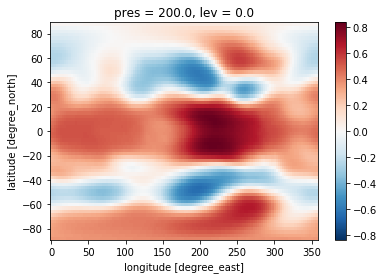

In [36]:
sst_hgt_cor.plot()

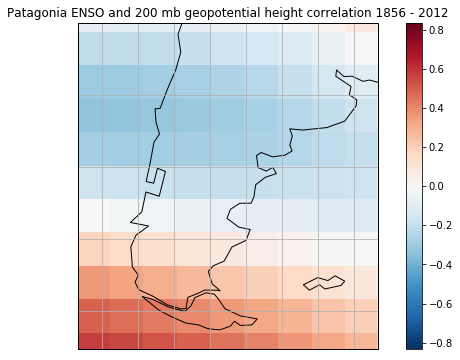

In [39]:
# PLOTTING OVER PATAGONIA
extent = [280, 305, -57, -30] # set extent 
central_lon = np.mean(extent[:2]) # get first two values in extent which are longitudes to calc center lon
central_lat = np.mean(extent[2:]) # get last two values in extent which are latutides to calc center lat

map_proj = ccrs.PlateCarree(central_lon) # this is the project we want our map to be on 
data_proj = ccrs.PlateCarree() # the data is in lat/lon, we can use PlateCarrree 

fig, ax = plt.subplots(figsize = (10, 6))  
ax = plt.axes(projection = map_proj) # create axis that has the map projection we want 
ax.set_extent(extent) # set extent based on what we have defined above

ax.add_feature(cfeature.OCEAN, facecolor = 'w', edgecolor = 'k') # add ocean, make it white 
ax.add_feature(cfeature.LAND, facecolor = 'w', edgecolor = 'k') # add land,make it white with black edges
ax.add_feature(cfeature.COASTLINE, edgecolor = 'k') # add coastline feature and set color to be white and edgecolor to be black 


cs = sst_hgt_cor.plot(transform = data_proj, ax = ax)
#plt.clabel(cs) # use plt to format the contour labels using clabel, %1.0f tell python to only show string of whole numbers and we added unit
ax.set_title('Patagonia ENSO and 200 mb geopotential height correlation 1856 - 2012');
ax.gridlines();

fig.savefig('rces-project_fig4.png')

## Figure 5 
### SST & Height correlation for Central Andes

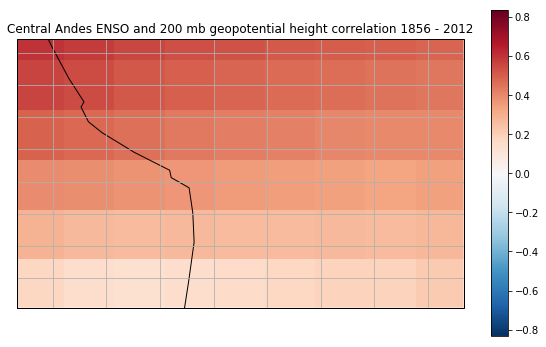

In [40]:
# PLOTTING OVER CENTRAL ANDES 
extent = [280, 305, -25, -10] # set extent 
central_lon = np.mean(extent[:2]) # get first two values in extent which are longitudes to calc center lon
central_lat = np.mean(extent[2:]) # get last two values in extent which are latutides to calc center lat

map_proj = ccrs.PlateCarree(central_lon) # this is the project we want our map to be on 
data_proj = ccrs.PlateCarree() # the data is in lat/lon, we can use PlateCarrree 

fig, ax = plt.subplots(figsize = (10, 6))  
ax = plt.axes(projection = map_proj) # create axis that has the map projection we want 
ax.set_extent(extent) # set extent based on what we have defined above

ax.add_feature(cfeature.OCEAN, facecolor = 'w', edgecolor = 'k') # add ocean, make it white 
ax.add_feature(cfeature.LAND, facecolor = 'w', edgecolor = 'k') # add land,make it white with black edges
ax.add_feature(cfeature.COASTLINE, edgecolor = 'k') # add coastline feature and set color to be white and edgecolor to be black 


cs = sst_hgt_cor.plot(transform = data_proj, ax = ax)
#plt.clabel(cs) # use plt to format the contour labels using clabel, %1.0f tell python to only show string of whole numbers and we added unit
ax.gridlines();
ax.set_title('Central Andes ENSO and 200 mb geopotential height correlation 1856 - 2012');

fig.savefig('rces-project_fig5.png')

### Now what happens when we break down the pattern and look at ~30 year chunks of time and the correlation between the NINO 3.4 index and geopotential height ?! 

In order to do this, let's take two slices of time from hgt_anom.Z3, and sst_index4corr. I have arbitrarily chosen 1875 - 1924 and 1950 - 1999. 

In [41]:
hgt_anom_time1 = hgt_anom.sel(time=slice('1875-01-01', '1924-12-01'))
hgt_anom_time1

<xarray.Dataset>
Dimensions:  (lat: 64, lon: 128, time: 600)
Coordinates:
    pres     float32 200.0
  * lat      (lat) float32 -87.8638 -85.09653 -82.31291 ... 85.09653 87.8638
  * lon      (lon) float32 0.0 2.8125 5.625 8.4375 ... 351.5625 354.375 357.1875
  * time     (time) datetime64[ns] 1875-01-01 1875-02-01 ... 1924-12-01
Data variables:
    Z3       (time, lat, lon) float32 -7.583008 -7.538086 ... -7.1533203
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [42]:
hgt_anom_time2 = hgt_anom.sel(time=slice('1950-01-01', '1999-12-01'))
hgt_anom_time2

<xarray.Dataset>
Dimensions:  (lat: 64, lon: 128, time: 600)
Coordinates:
    pres     float32 200.0
  * lat      (lat) float32 -87.8638 -85.09653 -82.31291 ... 85.09653 87.8638
  * lon      (lon) float32 0.0 2.8125 5.625 8.4375 ... 351.5625 354.375 357.1875
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 1999-12-01
Data variables:
    Z3       (time, lat, lon) float32 -52.555664 -52.899414 ... 59.137695
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [43]:
sst_index4corr_time1 = sst_index4corr.sel(time=slice('1875-01-01', '1924-12-01'))
sst_index4corr_time1

<xarray.DataArray 'sst' (time: 600, lev: 1)>
array([[-0.621976],
       [-0.683193],
       [-0.45759 ],
       ...,
       [-0.757038],
       [-1.165233],
       [-0.840025]], dtype=float32)
Coordinates:
  * lev      (lev) float32 0.0
  * time     (time) datetime64[ns] 1875-01-01 1875-02-01 ... 1924-12-01

In [44]:
sst_index4corr_time2 = sst_index4corr.sel(time=slice('1950-01-01', '1999-12-01'))
sst_index4corr_time2

<xarray.DataArray 'sst' (time: 600, lev: 1)>
array([[-0.95019 ],
       [-1.396947],
       [-1.007979],
       ...,
       [-0.757127],
       [-0.9994  ],
       [-1.083049]], dtype=float32)
Coordinates:
  * lev      (lev) float32 0.0
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 1999-12-01

In [45]:
sst_hgt_cor_time1 = correlation(hgt_anom_time1.Z3, sst_index4corr_time1, dims='time')
sst_hgt_cor_time1

<xarray.DataArray (lat: 64, lon: 128, lev: 1)>
array([[[0.426359],
        [0.427167],
        ...,
        [0.424812],
        [0.425601]],

       [[0.404374],
        [0.407586],
        ...,
        [0.399091],
        [0.401096]],

       ...,

       [[0.023504],
        [0.023369],
        ...,
        [0.024825],
        [0.023813]],

       [[0.084458],
        [0.083724],
        ...,
        [0.085264],
        [0.08472 ]]])
Coordinates:
    pres     float32 200.0
  * lat      (lat) float32 -87.8638 -85.09653 -82.31291 ... 85.09653 87.8638
  * lon      (lon) float32 0.0 2.8125 5.625 8.4375 ... 351.5625 354.375 357.1875
  * lev      (lev) float32 0.0

In [46]:
sst_hgt_cor_time2 = correlation(hgt_anom_time2.Z3, sst_index4corr_time2, dims='time')
sst_hgt_cor_time2

<xarray.DataArray (lat: 64, lon: 128, lev: 1)>
array([[[ 0.394277],
        [ 0.394675],
        ...,
        [ 0.393129],
        [ 0.393645]],

       [[ 0.375252],
        [ 0.378045],
        ...,
        [ 0.371282],
        [ 0.372834]],

       ...,

       [[-0.069953],
        [-0.070638],
        ...,
        [-0.067365],
        [-0.068758]],

       [[-0.026472],
        [-0.027342],
        ...,
        [-0.025214],
        [-0.026054]]])
Coordinates:
    pres     float32 200.0
  * lat      (lat) float32 -87.8638 -85.09653 -82.31291 ... 85.09653 87.8638
  * lon      (lon) float32 0.0 2.8125 5.625 8.4375 ... 351.5625 354.375 357.1875
  * lev      (lev) float32 0.0

## Figure 6 
### Okay, now let's plot the Patagonia correlations

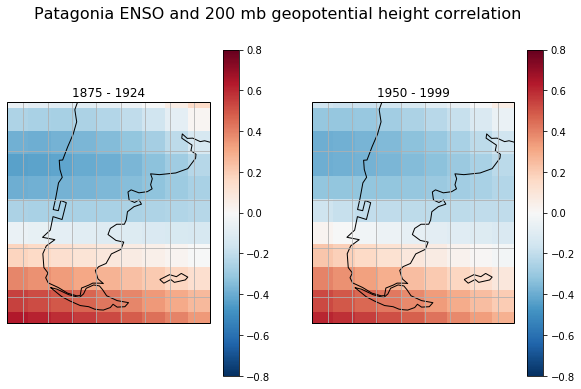

In [53]:
# PLOTTING OVER PATAGONIA
extent = [280, 305, -57, -30] # set extent 
central_lon = np.mean(extent[:2]) # get first two values in extent which are longitudes to calc center lon
central_lat = np.mean(extent[2:]) # get last two values in extent which are latutides to calc center lat

map_proj = ccrs.PlateCarree(central_lon) # this is the project we want our map to be on 
data_proj = ccrs.PlateCarree() # the data is in lat/lon, we can use PlateCarrree 

fig, ax = plt.subplots(ncols = 2, figsize = (10, 6), 
                       subplot_kw = {'projection':map_proj})  
fig.suptitle('Patagonia ENSO and 200 mb geopotential height correlation', fontsize=16)

#ax = plt.axes(projection = map_proj) # create axis that has the map projection we want 
ax[0].set_extent(extent) # set extent based on what we have defined above

ax[0].add_feature(cfeature.OCEAN, facecolor = 'w', edgecolor = 'k') # add ocean, make it white 
ax[0].add_feature(cfeature.LAND, facecolor = 'w', edgecolor = 'k') # add land,make it white with black edges
ax[0].add_feature(cfeature.COASTLINE, edgecolor = 'k') # add coastline feature and set color to be white and edgecolor to be black 


cs = sst_hgt_cor_time1.plot(transform = data_proj, ax = ax[0], vmin = -0.8, vmax = 0.8, cmap = 'RdBu_r', extend = 'neither')
#plt.clabel(cs) # use plt to format the contour labels using clabel, %1.0f tell python to only show string of whole numbers and we added unit
ax[0].gridlines();
ax[0].set_title('1875 - 1924');

ax[1].set_extent(extent) # set extent based on what we have defined above

ax[1].add_feature(cfeature.OCEAN, facecolor = 'w', edgecolor = 'k') # add ocean, make it white 
ax[1].add_feature(cfeature.LAND, facecolor = 'w', edgecolor = 'k') # add land,make it white with black edges
ax[1].add_feature(cfeature.COASTLINE, edgecolor = 'k') # add coastline feature and set color to be white and edgecolor to be black 


cs = sst_hgt_cor_time2.plot(transform = data_proj, ax = ax[1], vmin = -0.8, vmax = 0.8, cmap = 'RdBu_r', extend = 'neither')
#plt.clabel(cs) # use plt to format the contour labels using clabel, %1.0f tell python to only show string of whole numbers and we added unit
ax[1].gridlines();
ax[1].set_title('1950 - 1999');

fig.savefig('rces-project_fig6.png')

## Figure 7 
### Now plot the Central Andes correlations

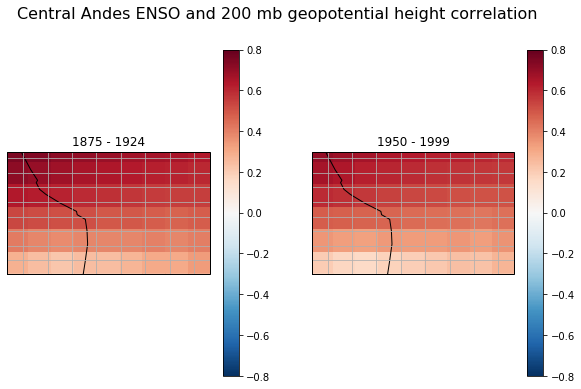

In [59]:
# PLOTTING OVER CENTRAL ANDES 
extent = [280, 305, -25, -10] # set extent
central_lon = np.mean(extent[:2]) # get first two values in extent which are longitudes to calc center lon
central_lat = np.mean(extent[2:]) # get last two values in extent which are latutides to calc center lat

map_proj = ccrs.PlateCarree(central_lon) # this is the project we want our map to be on 
data_proj = ccrs.PlateCarree() # the data is in lat/lon, we can use PlateCarrree 

fig, ax = plt.subplots(ncols = 2, figsize = (10, 6), 
                       subplot_kw = {'projection':map_proj})  
fig.suptitle('Central Andes ENSO and 200 mb geopotential height correlation', fontsize=16)

#ax = plt.axes(projection = map_proj) # create axis that has the map projection we want 
ax[0].set_extent(extent) # set extent based on what we have defined above

ax[0].add_feature(cfeature.OCEAN, facecolor = 'w', edgecolor = 'k') # add ocean, make it white 
ax[0].add_feature(cfeature.LAND, facecolor = 'w', edgecolor = 'k') # add land,make it white with black edges
ax[0].add_feature(cfeature.COASTLINE, edgecolor = 'k') # add coastline feature and set color to be white and edgecolor to be black 


cs = sst_hgt_cor_time1.plot(transform = data_proj, ax = ax[0], vmin = -0.8, vmax = 0.8, cmap = 'RdBu_r', extend = 'neither')
#plt.clabel(cs) # use plt to format the contour labels using clabel, %1.0f tell python to only show string of whole numbers and we added unit
ax[0].gridlines();
ax[0].set_title('1875 - 1924');

ax[1].set_extent(extent) # set extent based on what we have defined above

ax[1].add_feature(cfeature.OCEAN, facecolor = 'w', edgecolor = 'k') # add ocean, make it white 
ax[1].add_feature(cfeature.LAND, facecolor = 'w', edgecolor = 'k') # add land,make it white with black edges
ax[1].add_feature(cfeature.COASTLINE, edgecolor = 'k') # add coastline feature and set color to be white and edgecolor to be black 


cs = sst_hgt_cor_time2.plot(transform = data_proj, ax = ax[1], vmin = -0.8, vmax = 0.8, cmap = 'RdBu_r', extend = 'neither')
#plt.clabel(cs) # use plt to format the contour labels using clabel, %1.0f tell python to only show string of whole numbers and we added unit
ax[1].gridlines();
ax[1].set_title('1950 - 1999');

fig.savefig('rces-project_fig7.png')